# PREDICTING HOUSE SALES IN KING COUNTY USA

About Dataset
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

# importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORTING DATASET

In [2]:
df=pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.shape

(21613, 21)

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

# DATA PREPROCESSING

In [7]:
# REMOVING ID COLUMN AS IT IS OF NO IMPORTANCE

In [8]:
df.drop(columns=['id'],inplace=True)

In [9]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
# CHECKING FOR MISSING VALUES PRESENT
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

DATA SET IF FREE FROM MISSING VALUES. LETS CHECK FOR ANY DUPLICATE ENTRIES

In [11]:
df.duplicated().sum()

0

NO DUPLICATE ENTRIES ARE PRESENT

# EDA

COMPARING PRICE WITH VARIOUS FEATURES

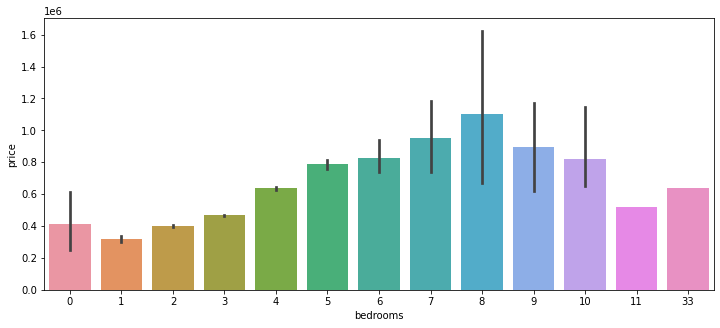

In [12]:
plt.figure(figsize=(12,5))
sns.barplot(x=df.bedrooms, y=df.price, data=df)
plt.show()

In [13]:
df['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33], dtype=int64)

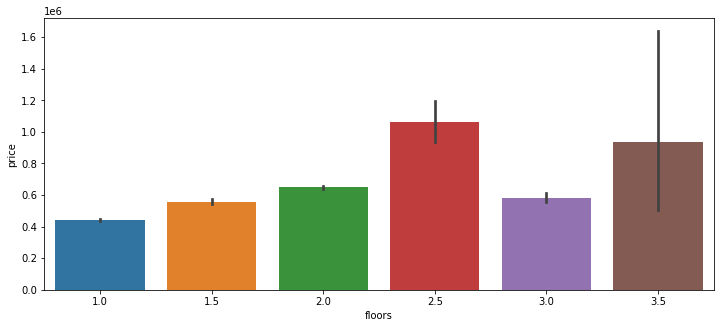

In [14]:
plt.figure(figsize=(12,5))
sns.barplot(x=df.floors, y=df.price, data=df)
plt.show();

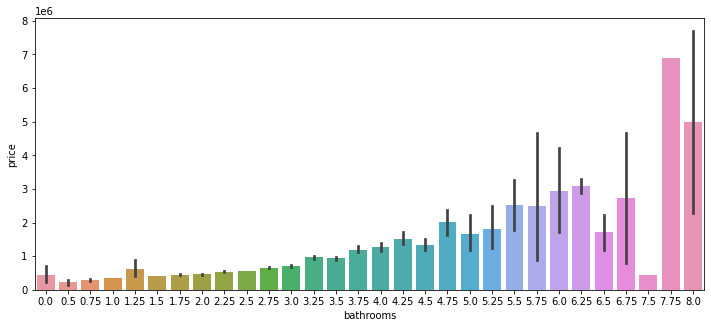

In [15]:
plt.figure(figsize=(12,5))
sns.barplot(x=df.bathrooms, y=df.price, data=df)
plt.show();

<Figure size 720x576 with 0 Axes>

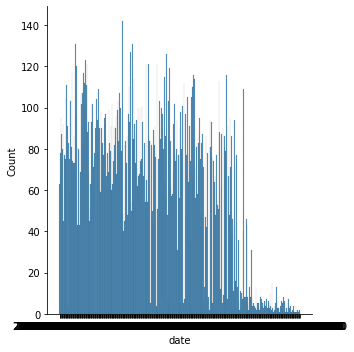

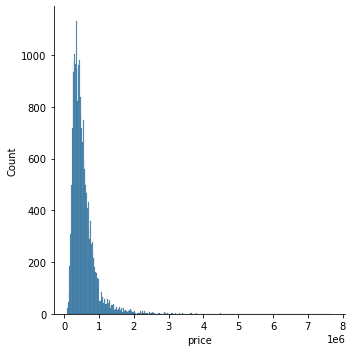

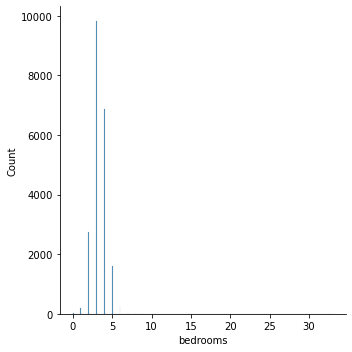

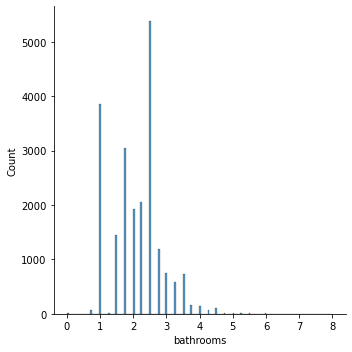

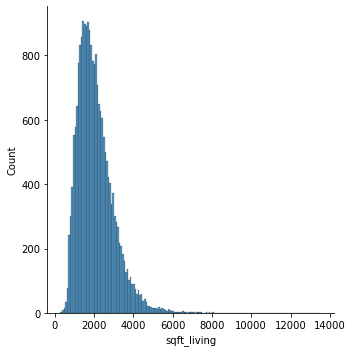

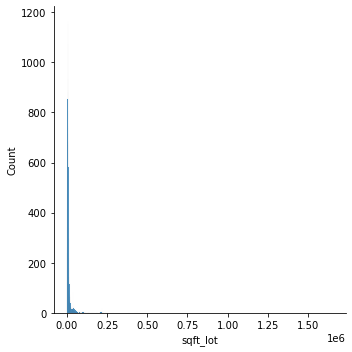

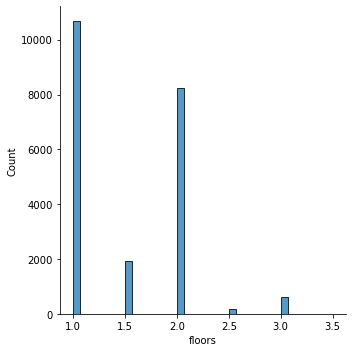

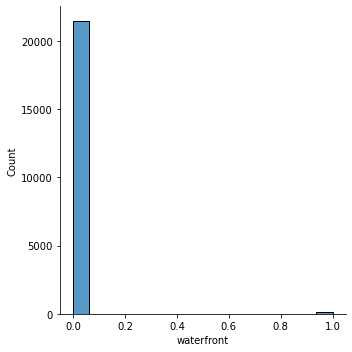

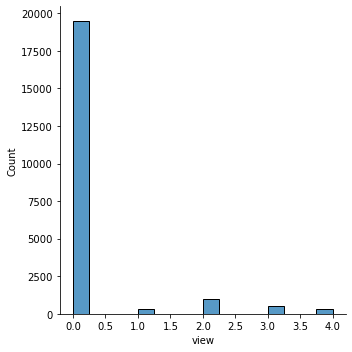

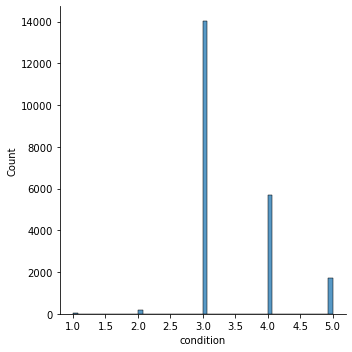

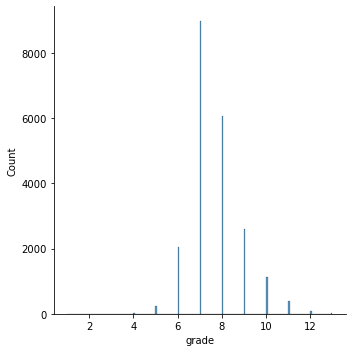

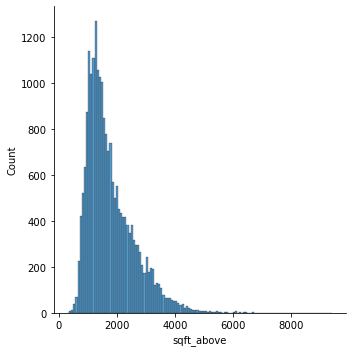

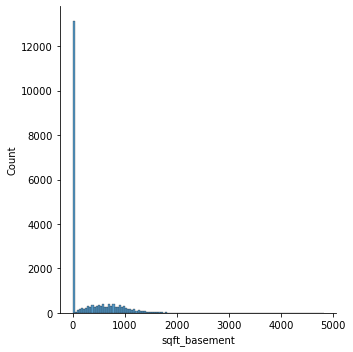

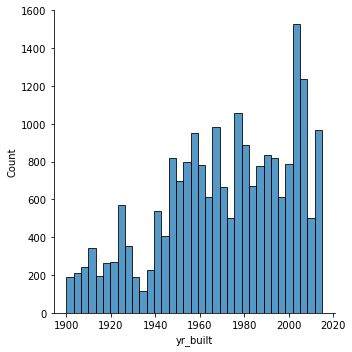

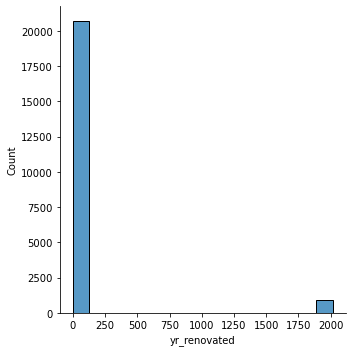

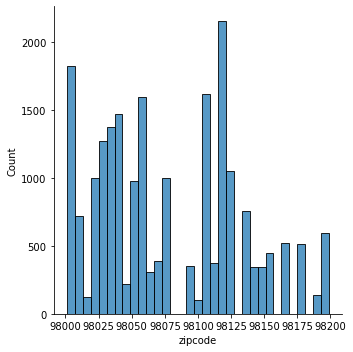

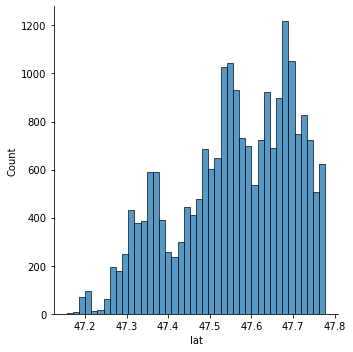

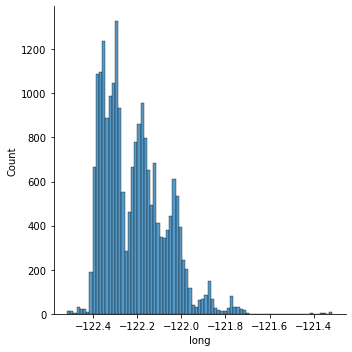

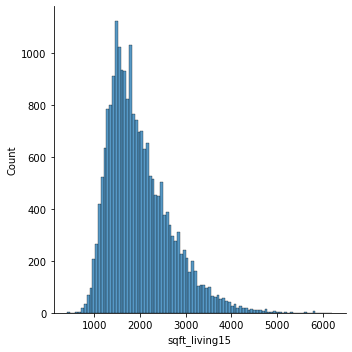

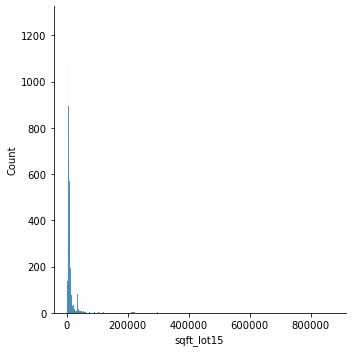

In [16]:
fig = plt.figure(figsize=(10,8))
for i in df.columns:
    sns.displot(data=df, x=df[i], kde=False)
    plt.show();

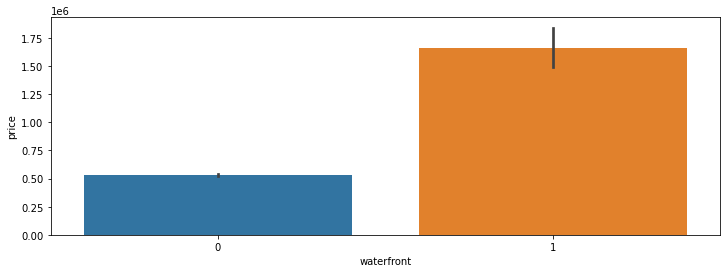

In [17]:
plt.figure(figsize=(12,4))
sns.barplot(x=df.waterfront, y=df.price, data=df, order=df.waterfront.value_counts().index)
plt.show();

CHECK THE CORRELATON BY PLOTTING HEATMAP

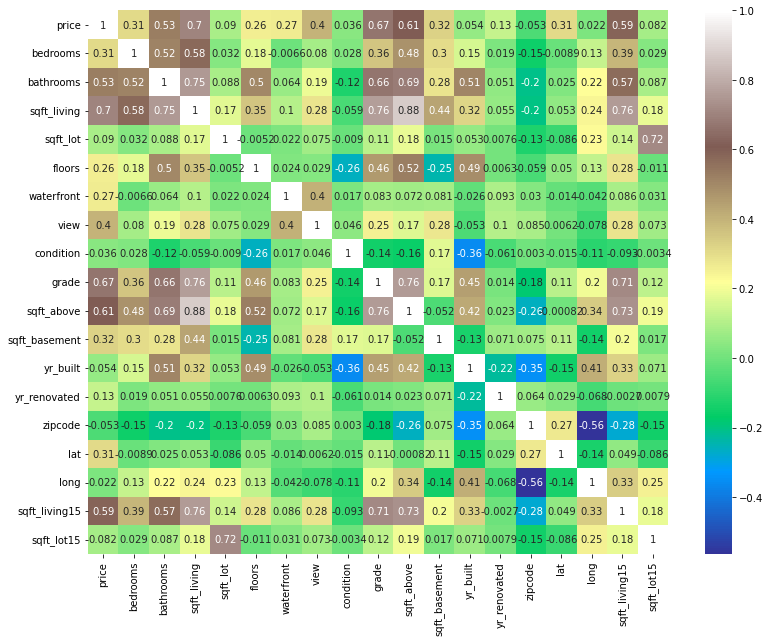

In [18]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(),annot=True,cmap='terrain')
plt.show()

Pairplot between Target and High correlated variables

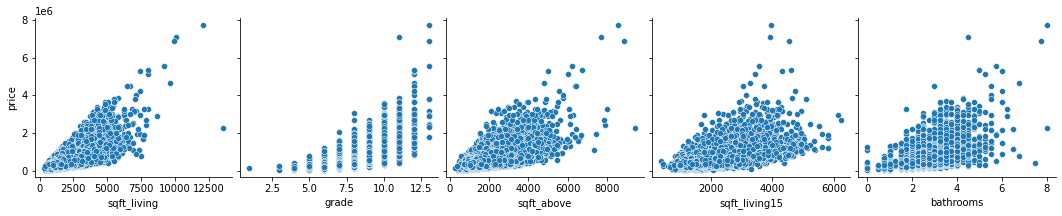

In [19]:
sns.pairplot(df,x_vars=['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms'], y_vars=['price'], height=3, aspect=1)

Lets make a new data fram using the selected features.

In [20]:
df1 =df[["sqft_living", "grade", "sqft_above", "sqft_living15", "price"]]

In [21]:
df1.head()

,sqft_living,grade,sqft_above,sqft_living15,price
0,1180,7,1180,1340,221900.0
1,2570,7,2170,1690,538000.0
2,770,6,770,2720,180000.0
3,1960,7,1050,1360,604000.0
4,1680,8,1680,1800,510000.0


CHECKING FOR OUTLIER

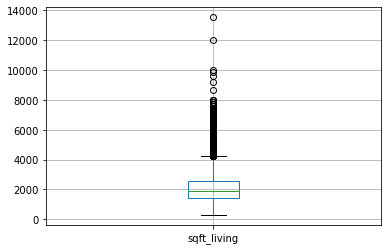

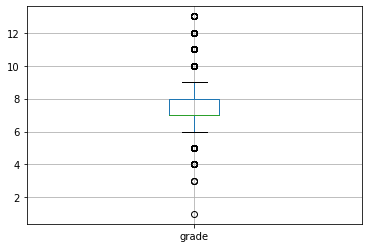

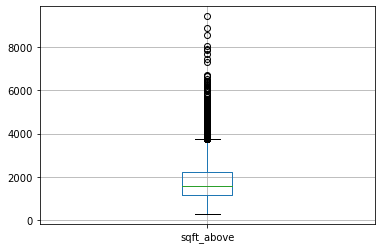

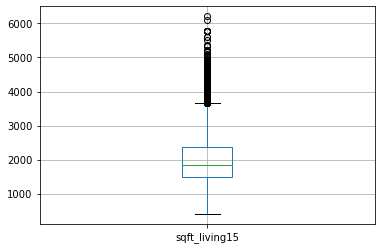

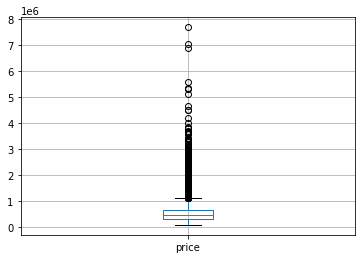

In [22]:
for column in df1.columns:
    if df1[column].dtype != "object":
        plt.figure()
        df1.boxplot([column])

OUTLIER PRESENT HERE ARE VER CLOSE TO EACH OTHER SO ASSUMING VALUES OF OUTLIER CONTAIN GOOD INFORMATION HENCE NOT REMOVING IT

# SPLITTING DATA INTO X AND Y

In [23]:
x = df1.iloc[:,:-1].values

In [24]:
x

array([[1180,    7, 1180, 1340],
       [2570,    7, 2170, 1690],
       [ 770,    6,  770, 2720],
       ...,
       [1020,    7, 1020, 1020],
       [1600,    8, 1600, 1410],
       [1020,    7, 1020, 1020]], dtype=int64)

In [25]:
y = df1.iloc[:,-1].values

In [26]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

# SCALING

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error

In [28]:
sc = StandardScaler()

In [29]:
x = sc.fit_transform(x)

In [30]:
x.shape

(21613, 4)

In [31]:
y.shape

(21613,)

# SPLITTING INTO TRAINING AND TESTING

In [32]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# MODEL TRAINING

LINEAR REGRESSION

In [33]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [34]:
lr.fit(x_train,y_train)

LinearRegression()

In [35]:
Y_pred=lr.predict(x_test)

In [36]:
Y_pred

array([ 337587.31303765, 1418302.17067131,  358520.04088818, ...,
        318110.9648134 ,  152631.70544782,  411396.44111867])

In [37]:
r2_score(y_test,Y_pred)

0.5469057509576318

In [38]:
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error
mae = mean_absolute_error(y_test, lr.predict(x_test))
mse = mean_squared_error(y_test, lr.predict(x_test))
rmse = np.sqrt(mse)

In [39]:
print("mae: " ,mae)
print("mean_squared_error:", mse)
print("rmse: " ,rmse)

mae:  158604.69671028343
mean_squared_error: 53883902489.8774
rmse:  232129.06429371872


GRADIENT BOOSTING

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
gbr =GradientBoostingRegressor()

In [41]:
gbr.fit(x_train, y_train)
y_pred_gbr = gbr.predict(x_test)
r2_score(y_test, y_pred_gbr)

0.6235936211689374

In [42]:
mae = mean_absolute_error(y_test, gbr.predict(x_test))
mse = mean_squared_error(y_test, gbr.predict(x_test))
rmse = np.sqrt(mse)

In [43]:
print("mae: " ,mae)
print("mean_squared_error:", mse)
print("rmse: " ,rmse)

mae:  144433.67819738676
mean_squared_error: 44763853561.08166
rmse:  211574.69971875573


RANDOM FOREST

In [44]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [45]:
y_pred = model.predict(x_test)
r2_score(y_test, y_pred)

0.5605952354355674

In [46]:
mae = mean_absolute_error(y_test, model.predict(x_test))
mse = mean_squared_error(y_test, model.predict(x_test))
rmse = np.sqrt(mse)

In [47]:
print("mae: " ,mae)
print("mean_squared_error:", mse)
print("rmse: " ,rmse)

mae:  152210.91671536068
mean_squared_error: 52255890551.29109
rmse:  228595.47360193092


WE CAN SEE THAT GRADIENT BOOSTING IS HAVING BETTER PERFORMANCE

# LETS DO HYPERPARAMETER TUNNING

In [48]:
GBR = GradientBoostingRegressor()

In [49]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000],
                  'max_depth'    : [4,6,8]
                 }

In [50]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)

In [51]:
grid_GBR.fit(x_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03, 0.04],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.9, 0.5, 0.2, 0.1]})

In [52]:
grid_GBR.best_params_

{'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.1}

Lets do predictions using the best parameters.

In [53]:
grid_GBR_tuned = GradientBoostingRegressor(learning_rate= 0.01, max_depth = 4, n_estimators = 500, subsample = 0.9)

In [54]:
grid_GBR_tuned.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500,
                          subsample=0.9)

In [55]:
y_pred_gbr = grid_GBR_tuned.predict(x_test)

Score after Hyper parameter tuning

In [56]:
score = r2_score(y_test, y_pred_gbr)
mae = mean_absolute_error(y_test, y_pred_gbr)
mse = mean_squared_error(y_test, y_pred_gbr)
rmse = np.sqrt(mse)
print("r2score: ",score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse: ", rmse)

r2score:  0.6261805898725303
mae:  144134.61177358148
mse:  44456200198.31355
rmse:  210846.3900528381


 We have improved the score slightly.

Saving the result into a seperate dataframe

In [59]:
predict = grid_GBR_tuned.predict(x)

In [61]:
price = df.price.values

In [62]:
PREDICT = pd.DataFrame(zip(price, predict), columns=("ACTUAL", "PREDICTION"))

In [63]:
PREDICT.head()

,ACTUAL,PREDICTION
0,221900.0,342507.674607
1,538000.0,536184.487667
2,180000.0,427935.651301
3,604000.0,404032.489571
4,510000.0,480893.237323
